# Fase 4 - Insights dos Dados (Self)

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MODELED = '../modeled/'

## Leitura dos arquivos Parquet contendo os gastos - DataFrame Panda

In [3]:
all_data = pd.read_parquet(MODELED+"parquet/sumario/")

In [4]:
all_data

,parlamentar,partido,uf,categoria,ano,valor
0,SILVIO TORRES,PSDB,SP,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",2015,282.880001
1,AUGUSTO CARVALHO,SOLIDARIEDADE,DF,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2015,441.509995
2,DILCEU SPERAFICO,PP,PR,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",2015,306.740013
3,DILCEU SPERAFICO,PP**,PR,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2015,3286.360016
4,PERPÉTUA ALMEIDA,PCdoB,AC,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2015,2685.400024
5,LUIZ COUTO,PT,PB,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",2015,29356.180176
6,GERALDO THADEU,PSD,MG,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",2015,177.000000
7,JEFFERSON CAMPOS,PSD,SP,COMBUSTÍVEIS E LUBRIFICANTES.,2015,2760.419960
8,GERALDO RESENDE,PSDB,MS,COMBUSTÍVEIS E LUBRIFICANTES.,2015,52810.560364
9,CARLOS EDUARDO CADOCA,PCdoB,PE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2015,6517.479980


## Geração de novo DataFrame numa estrutura Pivot

In [5]:
func = lambda x: x.sum()/1000
df = pd.pivot_table(all_data, index=['partido'], columns=['ano'], aggfunc=func, fill_value=0)

In [6]:
df

valor                                            \
ano                    2015          2016          2017          2018   
partido                                                                 
AVANTE          2204.089373   2494.843728   2919.242431   2534.028505   
CIDADANIA          0.000000      0.000000      0.000000      0.000000   
DEM            16193.741471  16222.640235  18076.617356  17730.170765   
MDB            22278.177661  24797.596584  22845.837400  21727.732967   
NOVO               0.000000      0.000000      0.000000      0.000000   
PATRI           2029.002791   1996.771457   2023.234143   2012.963296   
PATRIOTA           0.000000      0.000000      0.000000      0.000000   
PCdoB           5607.409971   5461.923198   6159.781941   4895.317107   
PDT             8652.457841   8789.993950   9343.805301   8808.464739   
PHS             1450.404460   1679.066157   1928.193107   1875.680264   
PL                 1.025860      0.000000      0.000000      0.000000   
PMDB            1572.012370      0.000000      0.000000      0.000000   
PMN               85.475140      0.000000      0.000000      0.000000   
PODE            6427.724439   7677.876524   8398.057981   7539.287950   
PP             22375.254777  23811.382969  23342.357955  20824.970080   
PP**             967.028330      0.000000      0.000000      0.000000   
PPL              403.077260    479.766949    469.560211    473.913560   
PPS             3491.207554   3333.684188   3803.233332   3436.722978   
PR             16351.030015  17150.773546  16056.964202  15926.842334   
PRB             8324.623354   9140.821945   9530.933422   8975.841094   
PROS            4037.488430   4149.652596   4525.618116   4760.087443   
PRP              117.354810      0.000000      0.000000      0.000000   
PRTB               0.000000    167.413300      0.000000      0.000000   
PSB            10378.398922  11077.602705  12216.661935  11394.182690   
PSC             2403.738633   2463.948307   3500.294993   3385.307502   
PSD            14530.072728  14904.884640  15749.518191  15685.758550   
PSDB           19844.539541  20392.850803  19843.370929  18856.590386   
PSL             2591.039237   2810.862476   3003.772915   2764.963790   
PSOL            2095.502534   2042.039286   2165.184446   1991.271593   
PT             24526.063949  24916.659301  25860.319401  26187.513563   
PTB             7844.462655   8011.426577   7220.515881   7333.636337   
PTdoB             40.018250      0.000000      0.000000      0.000000   
PV              1760.884980   1357.698021   1233.877782   1092.887635   
REDE             591.606170    665.725417    713.766231    665.811425   
S.PART.            0.014180      0.000000      0.000000      0.000000   
SD               513.250110      0.000000      0.000000      0.000000   
SOLIDARIEDADE   3916.319926   4379.094984   4198.305923   3831.767222   

                            
ano                   2019  
partido                     
AVANTE          741.044641  
CIDADANIA       824.368080  
DEM            4497.468545  
MDB            6042.681480  
NOVO            288.980390  
PATRI           161.737830  
PATRIOTA        593.557899  
PCdoB          1436.809470  
PDT            4394.877701  
PHS             229.673140  
PL             5077.446448  
PMDB              0.000000  
PMN              89.565360  
PODE           1847.511811  
PP             6557.606383  
PP**              0.000000  
PPL              44.925750  
PPS             218.512240  
PR             1221.275990  
PRB            4586.161762  
PROS           1629.523572  
PRP               0.000000  
PRTB              0.000000  
PSB            4258.240484  
PSC            1184.140480  
PSD            5639.500575  
PSDB           5163.751014  
PSL            5196.505182  
PSOL           1259.522771  
PT             9525.833956  
PTB            1904.498760  
PTdoB             0.000000  
PV              365.000100  
REDE             93.230680  
S.PART.          96.009830  

## Geração de Gráfico de Calor dos Gastos Anuais por Partido

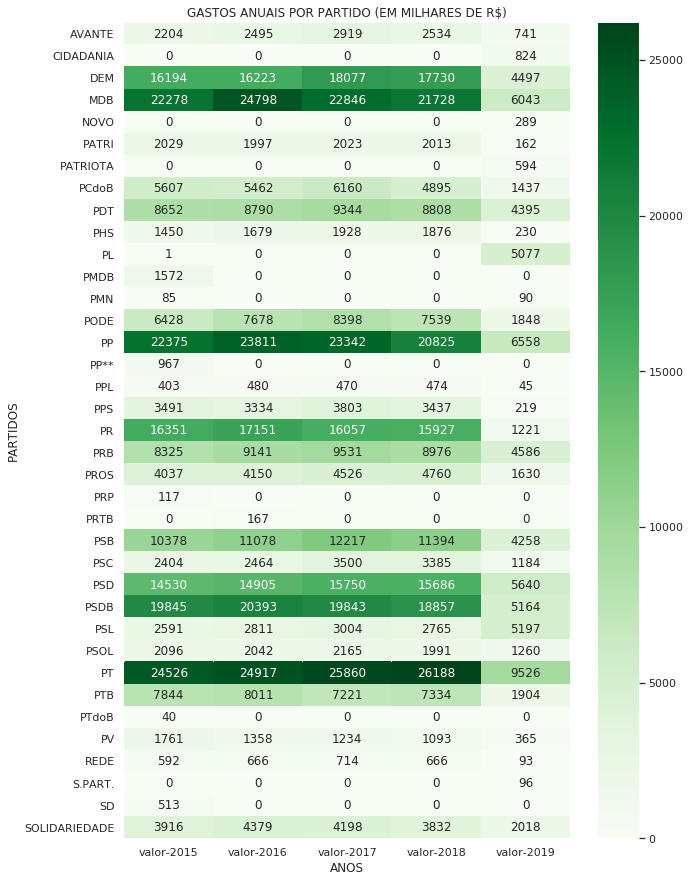

In [7]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 15))
sns.heatmap(df, cmap="Greens", annot=True, vmin=df.min().min(), vmax=df.max().max(), fmt='.0f')
plt.xlabel('ANOS')
plt.ylabel('PARTIDOS')
plt.title('GASTOS ANUAIS POR PARTIDO (EM MILHARES DE R$)')
plt.show()